In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import mlflow
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from mlflow.models import infer_signature
from mlflow.sklearn import log_model
from sklearn.preprocessing import LabelEncoder

In [23]:
data = pd.read_csv(r"C:\Users\aashutosh kumar\OneDrive\Pictures\diamonds.csv")
data.columns

Index(['Unnamed: 0', 'carat', 'cut', 'color', 'clarity', 'depth', 'table',
       'price', 'x', 'y', 'z'],
      dtype='object')

In [24]:
data = data.drop(columns = ['Unnamed: 0'], axis =1)
data.head(5)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


**EDA**

In [25]:
data.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [26]:
print(data.duplicated().sum())
data.drop_duplicates(inplace= True)

146


Text(0.5, 1.0, 'Distribution of carat')

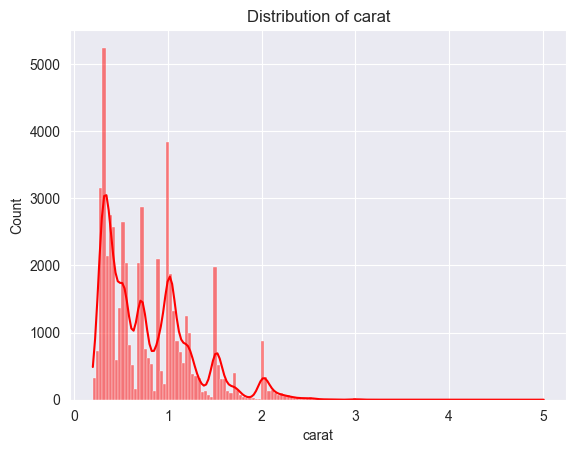

In [27]:
sns.set_style('darkgrid')
sns.histplot(data = data, x = 'carat', color = "red", kde = True)
plt.title('Distribution of carat')

Text(0.5, 1.0, 'Count of types of cut')

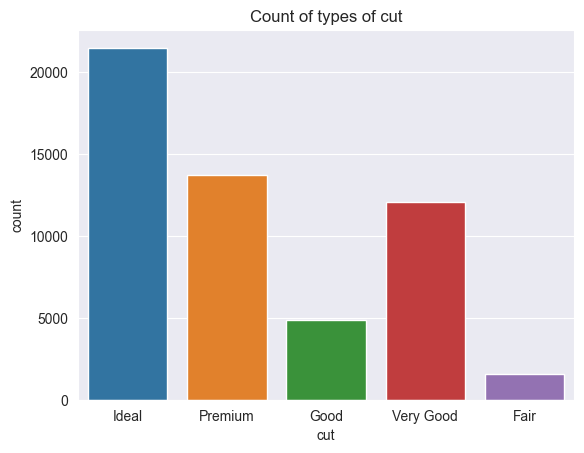

In [28]:
sns.set_style('darkgrid')
sns.countplot(data = data, x = 'cut', hue = 'cut')
plt.title('Count of types of cut')

Text(0.5, 1.0, 'Count of types of color')

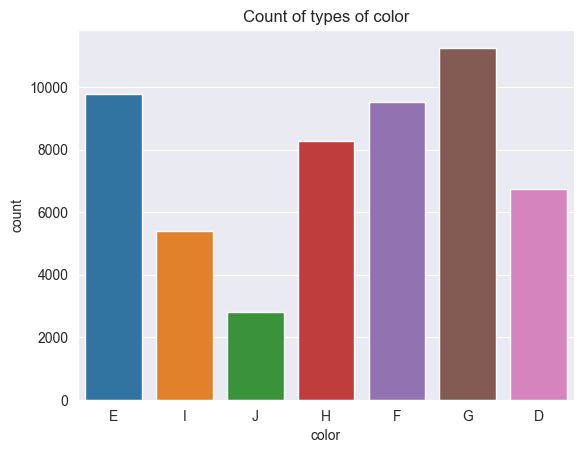

In [29]:
sns.set_style('darkgrid')
sns.countplot(data = data, x = 'color', hue = 'color')
plt.title('Count of types of color')

Text(0.5, 1.0, 'Count of types of clarity')

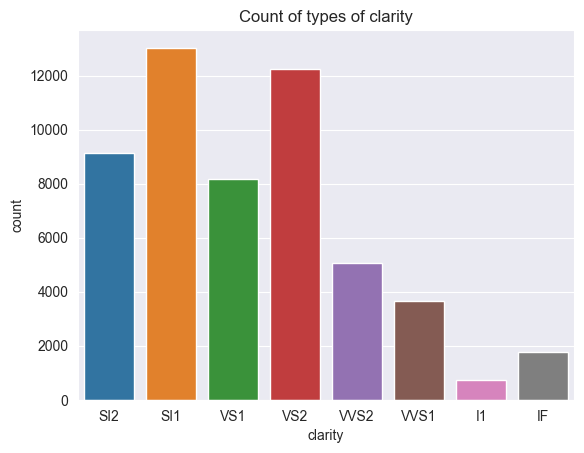

In [18]:
sns.set_style('darkgrid')
sns.countplot(data = data, x = 'clarity', hue = 'clarity')
plt.title('Count of types of clarity')

In [34]:
encoder = LabelEncoder()
data['color'] = encoder.fit_transform(data['color'])
data['clarity'] = encoder.fit_transform(data['clarity'])
data['cut'] = encoder.fit_transform(data['cut'])

In [35]:
data.head(5)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,2,1,3,61.5,55.0,326,3.95,3.98,2.43
1,0.21,3,1,2,59.8,61.0,326,3.89,3.84,2.31
2,0.23,1,1,4,56.9,65.0,327,4.05,4.07,2.31
3,0.29,3,5,5,62.4,58.0,334,4.20,4.23,2.63
4,0.31,1,6,3,63.3,58.0,335,4.34,4.35,2.75
